In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
import subspaceMSI
from processing import *
import seaborn as sns
from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.signal import medfilt

/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


No module named 'brainpy._c.composition'

          SPIKE
    Version     : 0.99.30
    Date        : 22-03-2022
    Revision Id : 563
*** zoom3D not loaded ***
plugins loaded:
Fitter,  Linear_prediction,  Peaks,  bcorr,  fastclean,  gaussenh,  rem_ridge,  sane,  sg,  test,  urQRd, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin
plugins loaded:
FTMS_calib,  PhaseMS,  diagonal_2DMS, 


In [2]:
def cluster_features(data):

    # calculate leiden clustering
    adata = ad.AnnData(data)
    sc.pp.pca(adata, n_comps=min(20, adata.X.shape[1] - 1))
    sc.pp.neighbors(adata)
    #sc.tl.leiden(adata)
    sc.tl.umap(adata,n_components=3)

    return adata.obsm["X_umap"]

In [3]:
with open('../processed_data/sagittal_4000_basis_R01_propagated_orig.pkl', 'rb') as fp:
    peak_data_orig =  pickle.load(fp)
with open('../processed_data/sagittal_4000_basis_R01_propagated_LR.pkl', 'rb') as fp:
    peak_data_lr =  pickle.load(fp)
with open('../../MSI/subspaceMSI_py/processed_data/sagittal_sim_4000_R00basis_avg_R00_propagated_recon.pkl', 'rb') as fp:
    peak_data_recon =  pickle.load(fp)
with open('../processed_data/sagittal_sim_4000_R00_decoded_basic.pkl', 'rb') as fp:
    peak_data_decoded =  pickle.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: '../processed_data/sagittal_4000_basis_R00_propagated_orig.pkl'

In [11]:
peak_data_orig['intens_mtx'].shape

(69847, 1984)

In [314]:
orig_umap = cluster_features(peak_data_orig['intens_mtx']/peak_data_orig['intens_mtx'].mean(0))
recon_umap = cluster_features(peak_data_recon['intens_mtx']/peak_data_recon['intens_mtx'].mean(0))
decoded_umap = cluster_features(peak_data_decoded['intens_mtx']/peak_data_decoded['intens_mtx'].mean(0))

In [2]:
recon_ = subspaceMSI.Subspace(out_dir='../processed_data')
recon_.experimentInfo('../file_dir_sagittal_2.json', if_simu = True, sampling_pattern = None)
m = recon_.parameters['m_HR']
t = recon_.parameters['t_HR']
coord = recon_.imaginginfo_BASIS['R01']['coordinates']

loaded parameters for the experiment...
{'project_name': 'sagittal_sim_4000_R00basis_slide2', 'pixel_num_HR': 4000, 'fid_length_HR': 1048576, 'sw_h': 1428571.4285714286, 'n_basis': 150, 'fid_length_LR': 50000, 'CALIB': [107798997.08328888, 5.694034141537156, 0], 'T': 7e-07, 't_HR': array([0.000000e+00, 7.000000e-07, 1.400000e-06, ..., 7.340011e-01,
       7.340018e-01, 7.340025e-01]), 't_LR': array([0.00000e+00, 7.00000e-07, 1.40000e-06, ..., 3.49979e-02,
       3.49986e-02, 3.49993e-02]), 'f_HR': array([1.00000000e-01, 1.36239188e+00, 2.72478376e+00, ...,
       7.14282990e+05, 7.14284352e+05, 7.14285714e+05]), 'f_LR': array([1.00000000e-01, 2.85714286e+01, 5.71428571e+01, ...,
       7.14228571e+05, 7.14257143e+05, 7.14285714e+05]), 'm_HR': array([1.86051712e+07, 1.52767133e+07, 1.28045289e+07, ...,
       1.50917969e+02, 1.50917681e+02, 1.50917393e+02]), 'm_LR': array([1.86051712e+07, 3.14599566e+06, 1.71553676e+06, ...,
       1.50929467e+02, 1.50923430e+02, 1.50917393e+02])}


FileNotFoundError: [Errno 2] No such file or directory: 'F:/20200820_SagittalSlice3/20200820_SagittalSlice3/20200820_SagittalSlice3/20200820_SagittalSlice3.d/ImagingInfo.xml'

In [47]:
with open('coordinates.pkl', 'wb') as fp:
    pickle.dump(recon_.imaginginfo_BASIS['R01']['coordinates'], fp, protocol=pickle.HIGHEST_PROTOCOL)

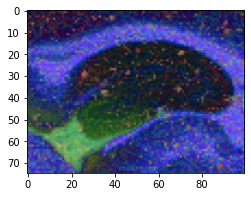

In [402]:
plt.figure(figsize=(4,3))
plt.imshow(hyperspectral_vis(np.array(orig_umap),coord,False)[25:100,200:300])

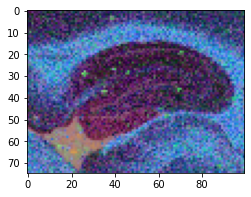

In [401]:
plt.figure(figsize=(4,3))
plt.imshow(hyperspectral_vis(np.array(recon_umap),coord[:-1],False)[25:100,200:300])

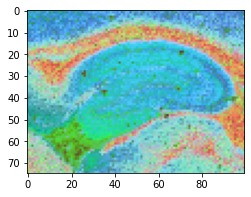

In [529]:
plt.figure(figsize=(4,3))
plt.imshow(hyperspectral_vis(np.array(decoded_umap),coord,False)[25:100,200:300])

In [531]:
decoded_umap.shape

(69847, 3)

In [3]:
with open('../processed_data/sagittal_4000_basis_R01_propagated_orig.pkl', 'rb') as fp:
    peak_data_orig =  pickle.load(fp)['intens_mtx']
with open('../processed_data/sagittal_4000_basis_R01_propagated_lr.pkl', 'rb') as fp:
    peak_data_lr =  pickle.load(fp)['intens_mtx']
with open('../processed_data/sagittal_4000_basis_R01_propagated_recon.pkl', 'rb') as fp:
    data =  pickle.load(fp)
    peak_data_recon =  data['intens_mtx']
    coord = data['coordinates']
with open('../processed_data/sagittal_4000_basis_R01_propagated_decoded_latent32.pkl', 'rb') as fp:
    peak_data_decoded =  pickle.load(fp)['intens_mtx']
with open('../processed_data/sagittal_4000_basis_R01_peak_data_orig.pkl', 'rb') as fp:
    avg_spec = pickle.load(fp)
    mz_index = avg_spec['mz_index']
    mzs = avg_spec['mz']

In [72]:
for mz in mzs[(mzs<713)&(mzs>710)]:
    print(np.where(mzs==mz))

(array([1109], dtype=int64),)
(array([1110], dtype=int64),)
(array([1111], dtype=int64),)
(array([1112], dtype=int64),)
(array([1113], dtype=int64),)
(array([1114], dtype=int64),)
(array([1115], dtype=int64),)
(array([1116], dtype=int64),)
(array([1117], dtype=int64),)


In [71]:
mzs[(mzs<713)&(mzs>710)][-2]

710.492262680747

In [462]:
corr_recon = []
corr_decoded = []
corr_lr = []


for i in tqdm(range(mz_index.size)):
    orig_img = IonImg(peak_data_orig[:,i],coord,background=True,return_mask=False)
    lr_img = IonImg(peak_data_lr[:,i],coord,background=True,return_mask=False)
    recon_img = IonImg(peak_data_recon[:,i],coord,background=True,return_mask=False)
    decoded_img = IonImg(peak_data_decoded[:,i],coord,background=True,return_mask=False)
    
    a = medfilt(orig_img,(3,3))[coord[:,1],coord[:,0]]
    axi = medfilt(recon_img,(3,3))[coord[:,1],coord[:,0]]
    axj = medfilt(decoded_img,(3,3))[coord[:,1],coord[:,0]]
    axk = medfilt(lr_img,(3,3))[coord[:,1],coord[:,0]]
    
    corr_recon.append(pearsonr(a,axi)[0])
    corr_decoded.append(pearsonr(a,axj)[0])
    corr_lr.append(pearsonr(a,axk)[0])

100%|██████████████████████████████████████████████████████████████████████████████| 1984/1984 [10:52<00:00,  3.04it/s]


In [397]:
spec_corr_recon = []
spec_corr_decoded = []
spec_corr_lr = []
for i in tqdm(range(coord.shape[0])):

    spec_corr_recon.append(pearsonr(peak_data_orig[i],peak_data_recon[i])[0])
    spec_corr_decoded.append(pearsonr(peak_data_orig[i],peak_data_decoded[i])[0])
    spec_corr_lr.append(pearsonr(peak_data_orig[i],peak_data_lr[i])[0])

100%|██████████████████████████████████████████████████████████████████████████| 69847/69847 [00:36<00:00, 1918.14it/s]


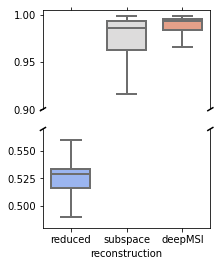

In [936]:
data = pd.DataFrame({'spectral correlation':np.concatenate([spec_corr_lr,spec_corr_recon,spec_corr_decoded]),
                     'reconstruction':['reduced']*len(coord)+['subspace']*len(coord)+['deepMSI']*len(coord)})
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True,figsize=(3,4))
g1=sns.boxplot(x='reconstruction',y='spectral correlation',data=data,showfliers=False,palette='coolwarm',linewidth=2,width=0.7,ax=ax1)
g2=sns.boxplot(x='reconstruction',y='spectral correlation',data=data,showfliers=False,palette='coolwarm',linewidth=2,width=0.7,ax=ax2)
g1.set(xlabel=None)
g1.set(ylabel=None)
g2.set(ylabel=None)

ax1.set_ylim(.9, 1.005)  # outliers only
ax2.set_ylim(0.48, .57)  # most of the data
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.savefig('../figures/speccorr_sag_r01.pdf')

(574,)


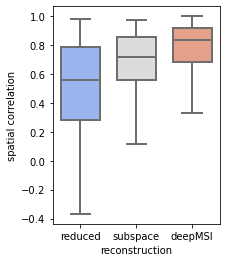

In [937]:
peaks_high = np.where(np.log10(peak_data_orig.mean(0))>4.4)
print(np.where(np.log10(peak_data_orig.mean(0))>4.4)[0].shape)
data = pd.DataFrame({'spatial correlation':np.concatenate([np.array(corr_lr)[peaks_high],np.array(corr_recon)[peaks_high],np.array(corr_decoded)[peaks_high]]),
                     'reconstruction':['reduced']*len(peaks_high[0])+['subspace']*len(peaks_high[0])+['deepMSI']*len(peaks_high[0])})
plt.figure(figsize=(3,4))
sns.boxplot(y='spatial correlation',x='reconstruction',data=data,palette='coolwarm',showfliers=False,linewidth=2,width=0.7)
plt.savefig('../figures/spacorr_sag_r01.pdf')

In [910]:
print(avg_spec['mz'][indices])

[810.60385364 811.47674736 811.58495072 813.48737323 814.63479124]


710.492262680747


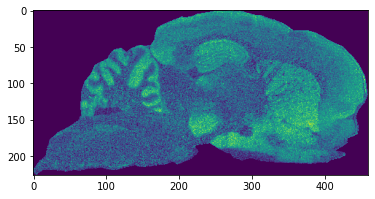

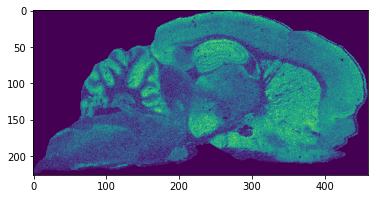

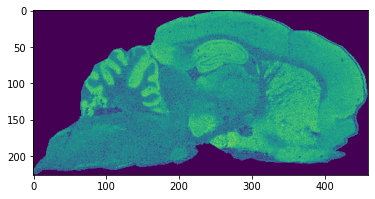

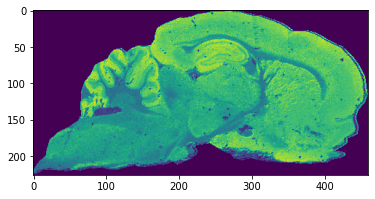

In [75]:
# indices = [706,671,666,664,652,650,642,]
indices = [671,666,664,652,642,658]
idx=1116
print(avg_spec['mz'][idx])
plt.figure()
plt.imshow(IonImg(peak_data_lr[:,idx]/peak_data_lr.sum(1),coord,True,False))
plt.figure()
plt.imshow(IonImg(peak_data_orig[:,idx]/peak_data_orig.sum(1),coord,True,False))
plt.figure()
plt.imshow(IonImg(peak_data_recon[:,idx]/peak_data_recon.sum(1),coord,True,False))
plt.figure()
plt.imshow(IonImg(peak_data_decoded[:,idx]/peak_data_decoded.sum(1),coord,True,False))

811.5849507221452


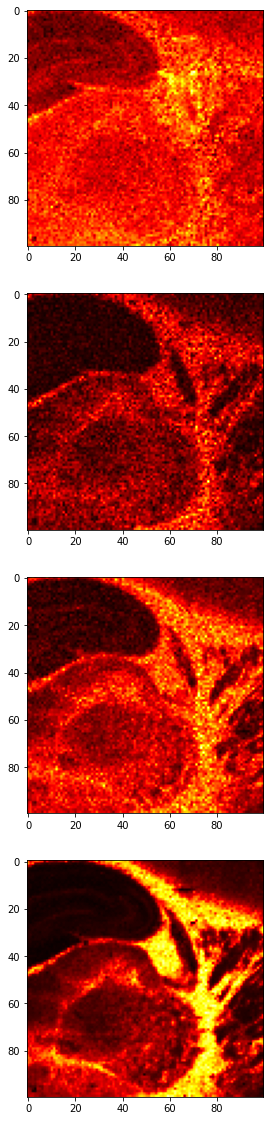

In [89]:
indices = [671,666,664,652,642,658]
idx=664
print(avg_spec['mz'][idx])
fig,axes = plt.subplots(4,1,figsize=(10,20))
ax = axes.ravel()
ax[0].imshow(IonImg(peak_data_lr[:,idx]/peak_data_lr.sum(1),coord,True,False)[40:140,240:340],'hot')
ax[1].imshow(IonImg(peak_data_orig[:,idx]/peak_data_orig.sum(1),coord,True,False)[40:140,240:340],'hot')
ax[2].imshow(IonImg(peak_data_recon[:,idx]/peak_data_recon.sum(1),coord,True,False)[40:140,240:340],'hot')
ax[3].imshow(IonImg(peak_data_decoded[:,idx]/peak_data_decoded.sum(1),coord,True,False)[40:140,240:340],'hot')
#plt.savefig('../figures/813.4874mz.pdf')

In [99]:
line_intens_orig = IonImg(peak_data_orig[:,idx]/peak_data_orig.sum(1),coord,True,False)[40:140,260:360][35]
line_intens_recon = IonImg(peak_data_recon[:,idx]/peak_data_recon.sum(1),coord,True,False)[40:140,260:360][35]
line_intens_decoded = IonImg(peak_data_decoded[:,idx]/peak_data_decoded.sum(1),coord,True,False)[40:140,260:360][35]

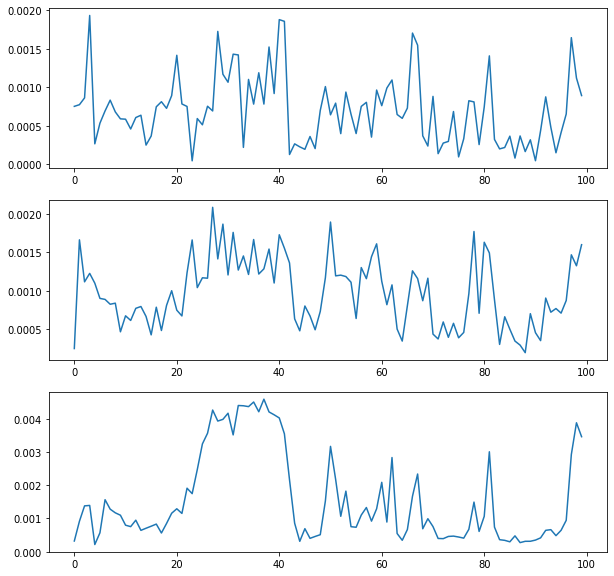

In [100]:
fig,axes = plt.subplots(3,1,figsize=(10,10))
ax = axes.ravel()
ax[0].plot(line_intens_orig)
ax[1].plot(line_intens_recon)
ax[2].plot(line_intens_decoded)
fig.savefig('../figures/line_intens_plot1.pdf')

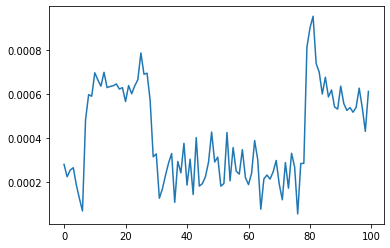

In [54]:
plt.plot(IonImg(peak_data_recon[:,idx]/peak_data_recon.sum(1),coord,True,False)[50:150,70:170][60])

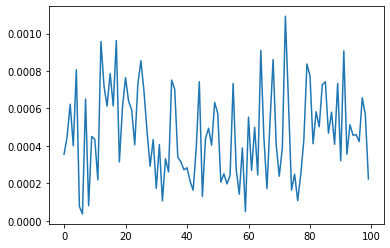

In [55]:
plt.plot(IonImg(peak_data_orig[:,idx]/peak_data_orig.sum(1),coord,True,False)[50:150,70:170][60])

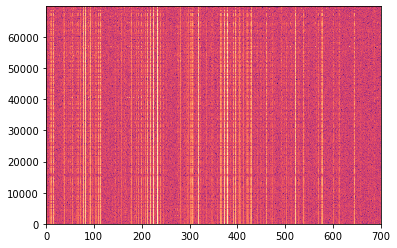

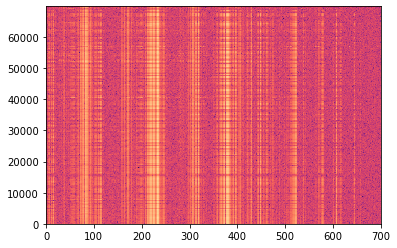

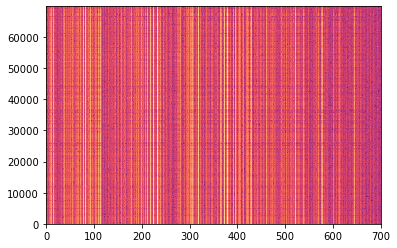

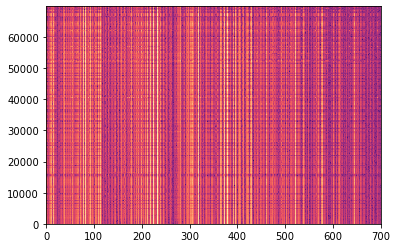

In [801]:
fig,ax=plt.subplots()
ax.pcolorfast(np.log10(peak_data_orig)[:,500:1200],cmap='magma')
fig,ax=plt.subplots()
ax.pcolorfast(np.log10(peak_data_lr)[:,500:1200],cmap='magma')
fig,ax=plt.subplots()
ax.pcolorfast(np.log10(peak_data_recon)[:,500:1200],cmap='magma')
fig,ax=plt.subplots()
ax.pcolorfast(np.log10(peak_data_decoded)[:,500:1200],cmap='magma')

In [940]:
peaks_high[0].shape

(574,)

In [500]:
orig_umap = cluster_features(peak_data_orig['intens_mtx']/peak_data_orig['intens_mtx'].mean(0))
recon_umap = cluster_features(peak_data_recon['intens_mtx']/peak_data_recon['intens_mtx'].mean(0))
decoded_umap = cluster_features(peak_data_decoded['intens_mtx']/peak_data_decoded['intens_mtx'].mean(0))

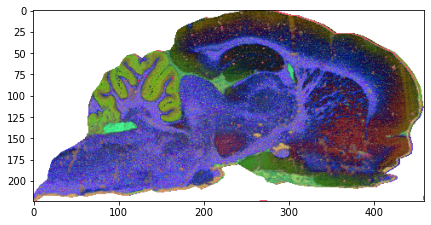

In [501]:
plt.figure(figsize=(7,5))
plt.imshow(hyperspectral_vis(np.array(orig_umap),coord,False))

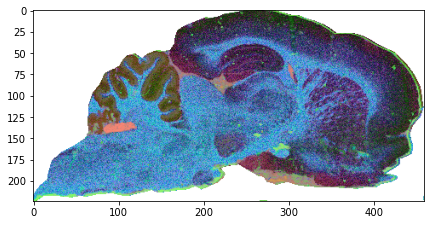

In [502]:
plt.figure(figsize=(7,5))
plt.imshow(hyperspectral_vis(np.array(recon_umap),coord,False))

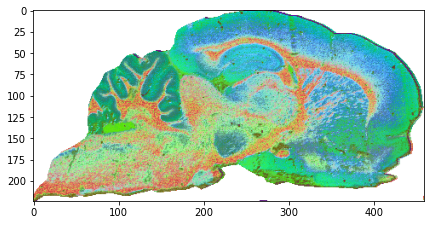

In [503]:
plt.figure(figsize=(7,5))
plt.imshow(hyperspectral_vis(np.array(decoded_umap),coord,False))

In [1153]:
from sklearn.cluster import KMeans
# orig_kmeans = KMeans(n_clusters=6,random_state=19).fit(orig_umap)
# recon_kmeans = KMeans(n_clusters=6,random_state=19).fit(recon_umap)
# decoded_kmeans = KMeans(n_clusters=6,random_state=19).fit(decoded_umap)
orig_kmeans = KMeans(n_clusters=6,random_state=19).fit(pca_orig_scores)
recon_kmeans = KMeans(n_clusters=6,random_state=19).fit(pca_recon_scores)
decoded_kmeans = KMeans(n_clusters=6,random_state=19).fit(pca_decoded_scores)

In [1142]:
recon_kmeans.labels_

array([7, 3, 3, ..., 0, 7, 4])

In [1134]:
import matplotlib
cmap = matplotlib.cm.get_cmap('inferno')
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=5.0)

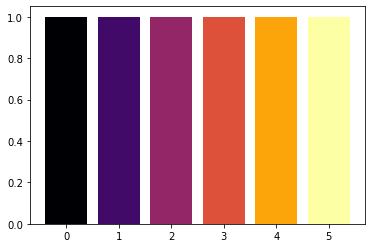

In [1170]:
plt.bar(height=[1,1,1,1,1,1],x=[0,1,2,3,4,5],color=[cmap(norm(0)),cmap(norm(1)),cmap(norm(2)),
                                                    cmap(norm(3)),cmap(norm(4)),cmap(norm(5))])
plt.savefig('../figures/kmeans_colors.pdf')
cmap(norm(5))
decoded_label = decoded_kmeans.labels_.copy()
decoded_label[decoded_kmeans.labels_==1] = 3
decoded_label[decoded_kmeans.labels_==2] = 4
decoded_label[decoded_kmeans.labels_==3] = 1
decoded_label[decoded_kmeans.labels_==4] = 5
decoded_label[decoded_kmeans.labels_==5] = 2
decoded_label[decoded_kmeans.labels_==0] = 0

recon_label = recon_kmeans.labels_.copy()
recon_label[recon_kmeans.labels_==1] = 5
recon_label[recon_kmeans.labels_==2] = 4
recon_label[recon_kmeans.labels_==3] = 2
recon_label[recon_kmeans.labels_==4] = 0
recon_label[recon_kmeans.labels_==5] = 3
recon_label[recon_kmeans.labels_==0] = 1

In [1155]:
recon_label

array([0, 1, 1, ..., 4, 3, 5])

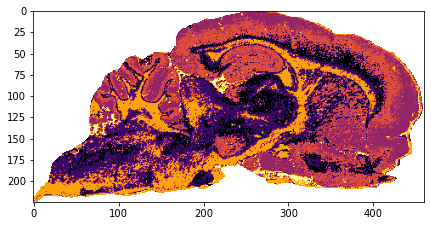

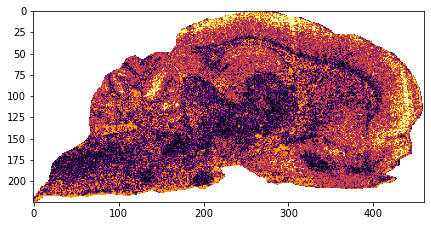

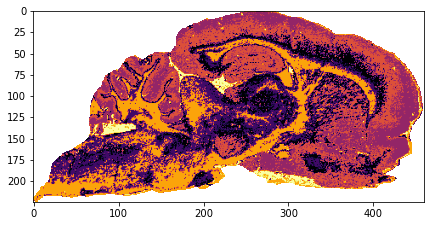

In [1166]:
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(orig_kmeans.labels_,coord),'inferno')
plt.savefig('../figures/kmeans_r01_orig.pdf')
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(recon_label,coord),'inferno')
plt.savefig('../figures/kmeans_r01_recon.pdf')
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(decoded_label,coord),'inferno')
plt.savefig('../figures/kmeans_r01_decoded.pdf')

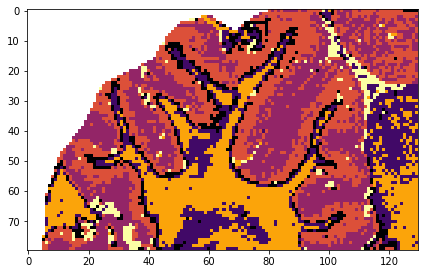

In [1167]:
plt.figure(figsize=(7,6))
plt.imshow(IonImg_show(orig_kmeans.labels_,coord)[50:130,60:190],'inferno')
plt.savefig('../figures/kmeans_r01_orig_detail.pdf')

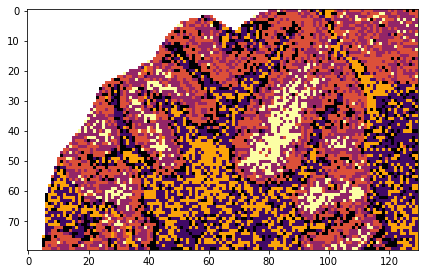

In [1168]:
plt.figure(figsize=(7,6))
plt.imshow(IonImg_show(recon_label,coord)[50:130,60:190],'inferno')
plt.savefig('../figures/kmeans_r01_recon_detail.pdf')

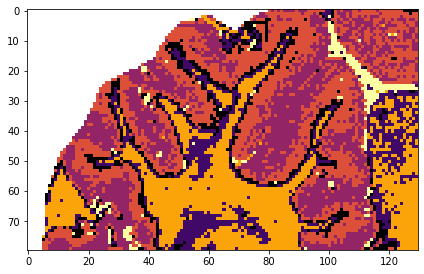

In [1169]:
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(decoded_label,coord)[50:130,60:190],'inferno')
plt.savefig('../figures/kmeans_r01_decoded_detail.pdf')

In [949]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(orig_kmeans.labels_,recon_kmeans.labels_)

0.2322574386565752

In [950]:
adjusted_rand_score(orig_kmeans.labels_,decoded_kmeans.labels_)

0.779719771909509

In [453]:
with open('../processed_data/sagittal_sim_4000_R00basis_slide2_R00_propagated_orig.pkl', 'rb') as fp:
    peak_data_orig =  pickle.load(fp)['intens_mtx']
with open('../processed_data/sagittal_sim_4000_R00basis_slide2_R00_propagated_LR.pkl', 'rb') as fp:
    peak_data_lr =  pickle.load(fp)['intens_mtx']
with open('../processed_data/sagittal_sim_4000_R00basis_slide2_R00_propagated_recon.pkl', 'rb') as fp:
    peak_data_recon =  pickle.load(fp)['intens_mtx']
with open('../processed_data/sagittal_sim_4000_R00basis_slide2_R00_propagated_decoded.pkl', 'rb') as fp:
    data =  pickle.load(fp)
    peak_data_decoded =  data['intens_mtx']
    coord = data['coordinates']
with open('../processed_data/sagittal_sim_4000_R00basis_slide2_R00_peak_data_orig.pkl', 'rb') as fp:
    avg_spec = pickle.load(fp)
    mz_index = avg_spec['mz_index']

In [424]:
plt.imshow(IonImg(peak_data_lr['intens_mtx'][:,861]/peak_data_lr['intens_mtx'].sum(1),coord,True,False))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [454]:
corr_recon = []
corr_decoded = []
corr_lr = []


for i in tqdm(range(mz_index.size)):
    orig_img = IonImg(peak_data_orig[:,i],coord,background=True,return_mask=False)
    lr_img = IonImg(peak_data_lr[:,i],coord,background=True,return_mask=False)
    recon_img = IonImg(peak_data_recon[:,i],coord,background=True,return_mask=False)
    decoded_img = IonImg(peak_data_decoded[:,i],coord,background=True,return_mask=False)
    
    a = medfilt(orig_img,(3,3))[coord[:,1],coord[:,0]]
    axi = medfilt(recon_img,(3,3))[coord[:,1],coord[:,0]]
    axj = medfilt(decoded_img,(3,3))[coord[:,1],coord[:,0]]
    axk = medfilt(lr_img,(3,3))[coord[:,1],coord[:,0]]
    
    corr_recon.append(pearsonr(a,axi)[0])
    corr_decoded.append(pearsonr(a,axj)[0])
    corr_lr.append(pearsonr(a,axk)[0])

100%|██████████████████████████████████████████████████████████████████████████████| 2165/2165 [07:14<00:00,  4.98it/s]


In [294]:
spec_corr_recon = []
spec_corr_decoded = []
spec_corr_lr = []
for i in tqdm(range(coord.shape[0])):

    spec_corr_recon.append(pearsonr(peak_data_orig[i],peak_data_recon[i])[0])
    spec_corr_decoded.append(pearsonr(peak_data_orig[i],peak_data_decoded[i])[0])
    spec_corr_lr.append(pearsonr(peak_data_orig[i],peak_data_lr[i])[0])

100%|██████████████████████████████████████████████████████████████████████████| 43063/43063 [00:23<00:00, 1807.22it/s]


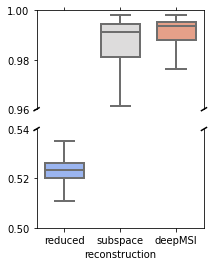

In [387]:
data = pd.DataFrame({'spectral correlation':np.concatenate([spec_corr_lr,spec_corr_recon,spec_corr_decoded]),
                     'reconstruction':['reduced']*len(coord)+['subspace']*len(coord)+['deepMSI']*len(coord)})
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True,figsize=(3,4))
g1=sns.boxplot(x='reconstruction',y='spectral correlation',data=data,showfliers=False,palette='coolwarm',linewidth=2,width=0.7,ax=ax1)
g2=sns.boxplot(x='reconstruction',y='spectral correlation',data=data,showfliers=False,palette='coolwarm',linewidth=2,width=0.7,ax=ax2)
g1.set(xlabel=None)
g1.set(ylabel=None)
g2.set(ylabel=None)

ax1.set_ylim(.96, 1.)  # outliers only
ax2.set_ylim(0.5, .54)  # most of the data
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.savefig('../figures/speccorr_sag_s2_r00.pdf')

In [416]:
np.median(np.log10(peak_data_orig.mean(0)))

4.339492228677048

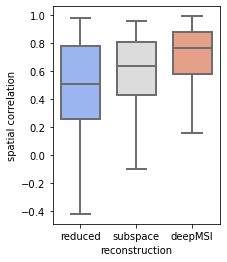

In [458]:
peaks_high = np.where(np.log10(peak_data_orig.mean(0))>4.4)
data = pd.DataFrame({'spatial correlation':np.concatenate([np.array(corr_lr)[peaks_high],np.array(corr_recon)[peaks_high],np.array(corr_decoded)[peaks_high]]),
                     'reconstruction':['reduced']*len(peaks_high[0])+['subspace']*len(peaks_high[0])+['deepMSI']*len(peaks_high[0])})
plt.figure(figsize=(3,4))
sns.boxplot(y='spatial correlation',x='reconstruction',data=data,palette='coolwarm',showfliers=False,linewidth=2,width=0.7)
plt.savefig('../figures/spacorr_sag_s2_r00.pdf')

<AxesSubplot:xlabel='spatial correlation', ylabel='Count'>

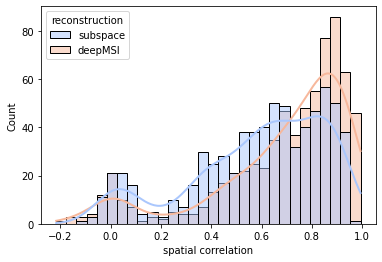

In [457]:
peaks_high = np.where(np.log10(peak_data_orig.mean(0))>4.4)
data = pd.DataFrame({'spatial correlation':np.concatenate([np.array(corr_recon)[peaks_high],np.array(corr_decoded)[peaks_high]]),'reconstruction':['subspace']*len(peaks_high[0])+['deepMSI']*len(peaks_high[0])})
sns.histplot(x='spatial correlation',hue='reconstruction',bins=30,kde=True,data=data,palette='coolwarm',line_kws={'linewidth':2})

798.5453598441721

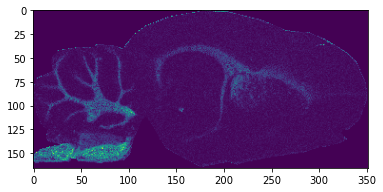

In [281]:
plt.imshow(IonImg(peak_data_orig['intens_mtx'][:,865]/peak_data_orig['intens_mtx'].sum(1),coord,True,False))
mz[853]

798.5453598441721

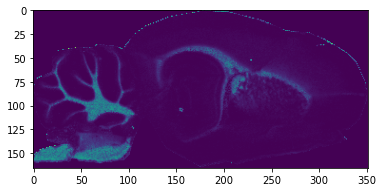

In [276]:
plt.imshow(IonImg(peak_data_decoded['intens_mtx'][:,865]/peak_data_decoded['intens_mtx'].sum(1),coord,True,False))
mz[853]

798.5453598441721

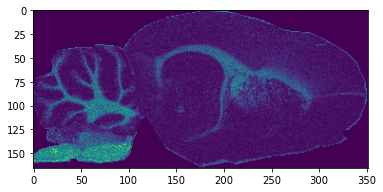

In [274]:
plt.imshow(IonImg(peak_data_recon['intens_mtx'][:,865]/peak_data_recon['intens_mtx'].sum(1),coord,True,False))
mz[853]

In [113]:
orig_umap = cluster_features(peak_data_orig['intens_mtx']/peak_data_orig['intens_mtx'].mean(0))
recon_umap = cluster_features(peak_data_recon['intens_mtx']/peak_data_recon['intens_mtx'].mean(0))
decoded_umap = cluster_features(peak_data_decoded['intens_mtx']/peak_data_decoded['intens_mtx'].mean(0))

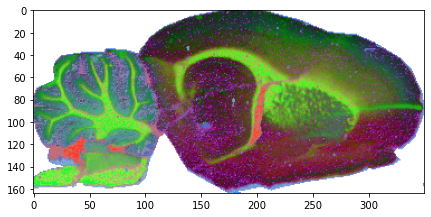

In [115]:
coord = recon_.imaginginfo_HR['R00']['coordinates']
plt.figure(figsize=(7,5))
plt.imshow(hyperspectral_vis(np.array(orig_umap),coord,False))

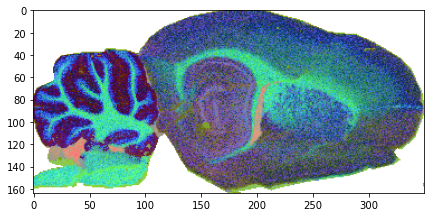

In [116]:
plt.figure(figsize=(7,5))
plt.imshow(hyperspectral_vis(np.array(recon_umap),coord,False))

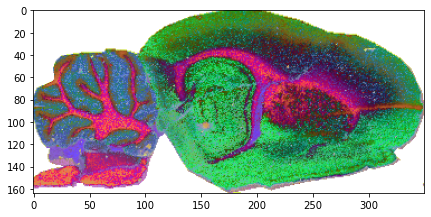

In [117]:
plt.figure(figsize=(7,5))
plt.imshow(hyperspectral_vis(np.array(decoded_umap),coord,False))

In [955]:
pca_orig = PCA(n_components=20)
pca_orig = pca_orig.fit(peak_data_orig)
pca_recon = PCA(n_components=20)
pca_recon = pca_recon.fit(peak_data_recon)
pca_decoded = PCA(n_components=20)
pca_decoded = pca_decoded.fit(peak_data_decoded)

pca_orig_scores = pca_orig.fit_transform(peak_data_orig)
pca_decoded_scores = pca_decoded.fit_transform(peak_data_decoded)
pca_recon_scores = pca_recon.fit_transform(peak_data_recon)

In [24]:
from sklearn.cluster import KMeans
# orig_kmeans = KMeans(n_clusters=6,random_state=19).fit(orig_umap)
# recon_kmeans = KMeans(n_clusters=6,random_state=19).fit(recon_umap)
# decoded_kmeans = KMeans(n_clusters=6,random_state=19).fit(decoded_umap)
orig_kmeans = KMeans(n_clusters=6,random_state=19).fit(pca_orig_scores)
recon_kmeans = KMeans(n_clusters=6,random_state=19).fit(pca_recon_scores)
decoded_kmeans = KMeans(n_clusters=6,random_state=19).fit(pca_decoded_scores)

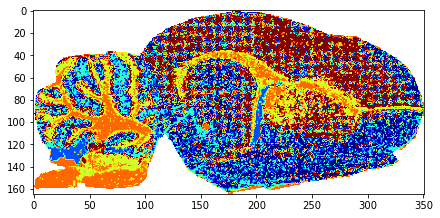

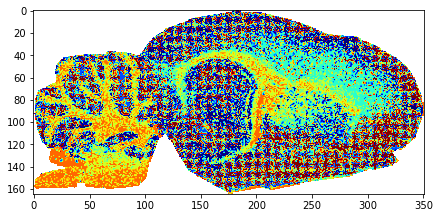

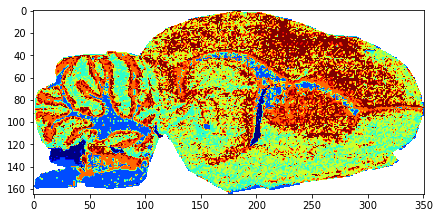

In [25]:
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(orig_kmeans.labels_,coord),'jet_r')
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(recon_kmeans.labels_,coord),'jet_r')
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(decoded_kmeans.labels_,coord),'jet_r')

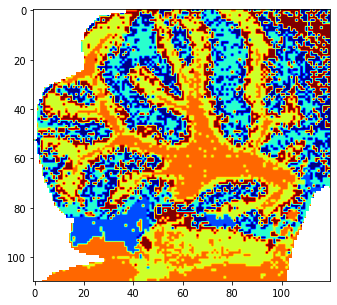

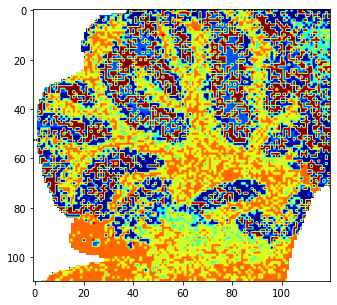

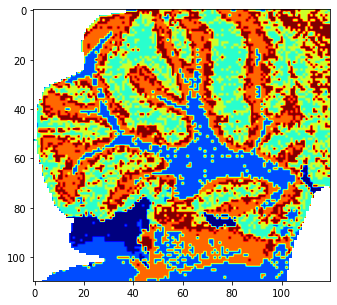

In [28]:
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(orig_kmeans.labels_,coord)[40:150,0:120],'jet_r')
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(recon_kmeans.labels_,coord)[40:150,0:120],'jet_r')
plt.figure(figsize=(7,5))
plt.imshow(IonImg_show(decoded_kmeans.labels_,coord)[40:150,0:120],'jet_r')

In [7]:
pca_orig = PCA(n_components=20)
pca_orig = pca_orig.fit(peak_data_orig)
pca_recon = PCA(n_components=20)
pca_recon = pca_recon.fit(peak_data_recon)
pca_decoded = PCA(n_components=20)
pca_decoded = pca_decoded.fit(peak_data_decoded)

pca_orig_scores = pca_orig.fit_transform(peak_data_orig)
pca_decoded_scores = pca_decoded.fit_transform(peak_data_decoded)
pca_recon_scores = pca_recon.fit_transform(peak_data_recon)

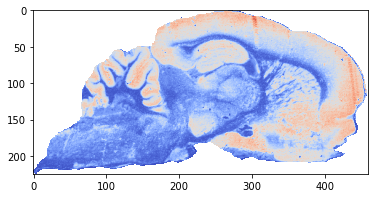

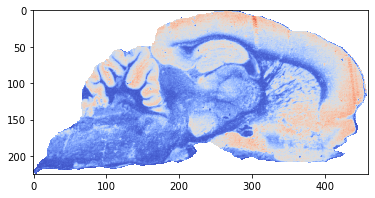

In [517]:
plt.imshow(IonImg_show(pca_orig_scores[:,0],coord),'coolwarm')
plt.figure()
plt.imshow(IonImg_show(pca_decoded_scores[:,0],coord),'coolwarm')

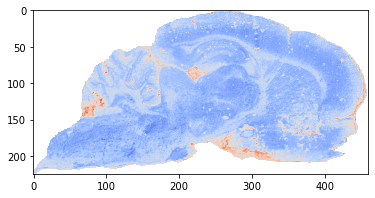

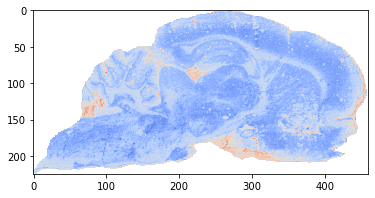

In [518]:
plt.imshow(IonImg_show(pca_orig_scores[:,1],coord),'coolwarm')
plt.figure()
plt.imshow(IonImg_show(pca_decoded_scores[:,1],coord),'coolwarm')

<AxesSubplot:xlabel='original scores', ylabel='reconstructed scores'>

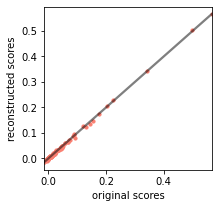

In [527]:
data = pd.DataFrame({'original scores':pca_orig.components_[0],'reconstructed scores':pca_decoded.components_[0]})
plt.figure(figsize=(3,3))
sns.regplot(x='original scores',y='reconstructed scores',data=data,color='salmon',line_kws={'color':'black','alpha':0.5},scatter_kws={'s':10,'alpha':1},ci=None)

<AxesSubplot:xlabel='original scores', ylabel='reconstructed scores'>

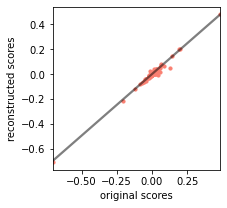

In [526]:
data = pd.DataFrame({'original scores':pca_orig.components_[1],'reconstructed scores':pca_decoded.components_[1]})
plt.figure(figsize=(3,3))
sns.regplot(x='original scores',y='reconstructed scores',data=data,color='salmon',line_kws={'color':'black','alpha':0.5},scatter_kws={'s':10,'alpha':1},ci=None)

In [8]:
from scipy.stats import pearsonr,spearmanr
pca_recon_r = []
pca_decoded_r = []
scores_recon_r = []
scores_decoded_r = []
for i in range(5):
    pca_recon_r_ = []
    pca_decoded_r_ = []
    scores_recon_r_ = []
    scores_decoded_r_ = []
    for j in range(5):
        pca_recon_r_.append(pearsonr(pca_orig.components_[i,:],pca_recon.components_[j,:])[0])
        pca_decoded_r_.append(pearsonr(pca_orig.components_[i,:],pca_decoded.components_[j,:])[0])
        scores_decoded_r_.append(pearsonr(pca_orig_scores[:,i],pca_decoded_scores[:,j])[0])
        scores_recon_r_.append(pearsonr(pca_orig_scores[:,i],pca_recon_scores[:,j])[0])
    pca_recon_r.append(pca_recon_r_)
    pca_decoded_r.append(pca_decoded_r_)
    scores_recon_r.append(scores_recon_r_)
    scores_decoded_r.append(scores_decoded_r_)

In [9]:
print(pca_orig.explained_variance_ratio_.sum(),pca_recon.explained_variance_ratio_.sum(),pca_decoded.explained_variance_ratio_.sum())

0.9815748755698135 0.9976216039218573 0.9997869131376936


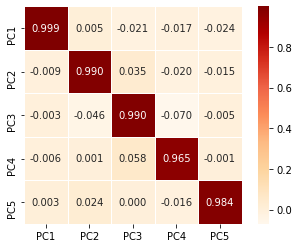

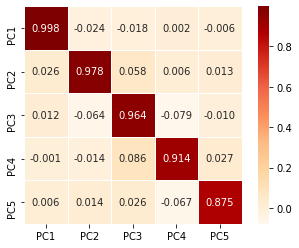

In [23]:
plt.figure()
sns.heatmap(pca_decoded_r, annot=True, fmt=".3f", linewidths=.5,cmap='OrRd',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'],alpha=1)
plt.savefig('../figures/deepmsi_pcacomp_corr.pdf')
plt.figure()
sns.heatmap(scores_decoded_r, annot=True, fmt=".3f", linewidths=.5,cmap='OrRd',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.savefig('../figures/deepmsi_pcascore_corr.pdf')

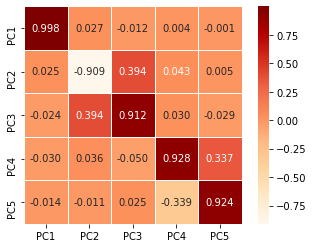

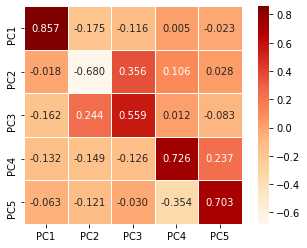

In [24]:
plt.figure()
sns.heatmap(pca_recon_r, annot=True, fmt=".3f", linewidths=.5,cmap='OrRd',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.savefig('../figures/subspace_pcacomp_corr.pdf')
plt.figure()
sns.heatmap(scores_recon_r, annot=True, fmt=".3f", linewidths=.5,cmap='OrRd',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.savefig('../figures/subspace_pcascore_corr.pdf')

<AxesSubplot:>

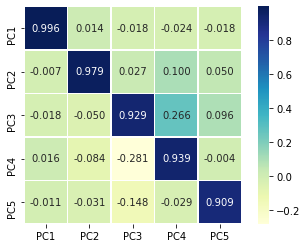

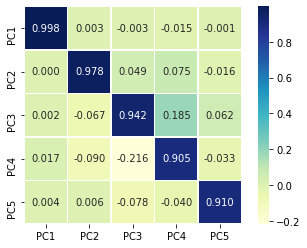

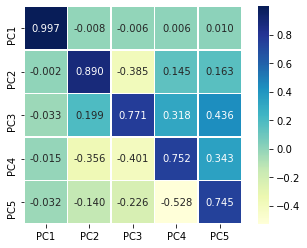

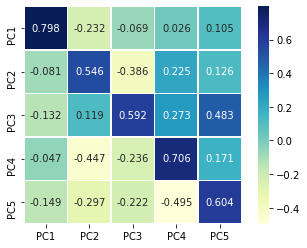

In [508]:
#distant tissue section
plt.figure()
sns.heatmap(pca_decoded_r, annot=True, fmt=".3f", linewidths=.5,cmap='YlGnBu',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.figure()
sns.heatmap(scores_decoded_r, annot=True, fmt=".3f", linewidths=.5,cmap='YlGnBu',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.figure()
sns.heatmap(pca_recon_r, annot=True, fmt=".3f", linewidths=.5,cmap='YlGnBu',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.figure()
sns.heatmap(scores_recon_r, annot=True, fmt=".3f", linewidths=.5,cmap='YlGnBu',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])

In [14]:
with open('../processed_data/sagittal_latent32_epoch10_R02_propagated_orig.pkl', 'rb') as fp:
    peak_data_orig =  pickle.load(fp)
with open('../processed_data/sagittal_latent32_epoch10_R02_propagated_recon.pkl', 'rb') as fp:
    peak_data_recon =  pickle.load(fp)
with open('../processed_data/sagittal_4000_basis_R02_propagated_decoded_latent32.pkl', 'rb') as fp:
    peak_data_decoded =  pickle.load(fp)

<AxesSubplot:>

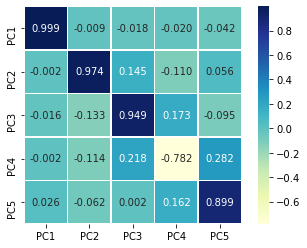

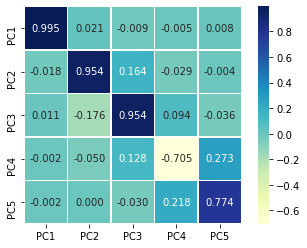

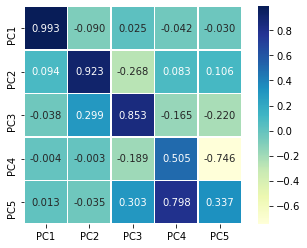

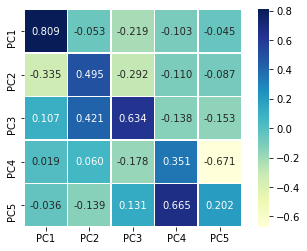

In [20]:
#coronal dataset
from scipy.stats import pearsonr,spearmanr
pca_recon_r = []
pca_decoded_r = []
scores_recon_r = []
scores_decoded_r = []
for i in range(5):
    pca_recon_r_ = []
    pca_decoded_r_ = []
    scores_recon_r_ = []
    scores_decoded_r_ = []
    for j in range(5):
        pca_recon_r_.append(pearsonr(pca_orig.components_[i,:],pca_recon.components_[j,:])[0])
        pca_decoded_r_.append(pearsonr(pca_orig.components_[i,:],pca_decoded.components_[j,:])[0])
        scores_decoded_r_.append(pearsonr(pca_orig_scores[:,i],pca_decoded_scores[:,j])[0])
        scores_recon_r_.append(pearsonr(pca_orig_scores[:,i],pca_recon_scores[:,j])[0])
    pca_recon_r.append(pca_recon_r_)
    pca_decoded_r.append(pca_decoded_r_)
    scores_recon_r.append(scores_recon_r_)
    scores_decoded_r.append(scores_decoded_r_)
    
plt.figure()
sns.heatmap(pca_decoded_r, annot=True, fmt=".3f", linewidths=.5,cmap='YlGnBu',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.figure()
sns.heatmap(scores_decoded_r, annot=True, fmt=".3f", linewidths=.5,cmap='YlGnBu',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.figure()
sns.heatmap(pca_recon_r, annot=True, fmt=".3f", linewidths=.5,cmap='YlGnBu',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])
plt.figure()
sns.heatmap(scores_recon_r, annot=True, fmt=".3f", linewidths=.5,cmap='YlGnBu',square=True,xticklabels=['PC1','PC2','PC3','PC4','PC5'],
           yticklabels=['PC1','PC2','PC3','PC4','PC5'])

In [815]:
import requests
import io

def LipidMaps_annotate(mass_list,adducts,ppm,site_url):
    
    Data = []
    matched = []
    unmatched = []
    
    for mass in mass_list:
        tolerance = ppm*1e-6*mass
        print(mass)
        Data_ = []
        for adduct in adducts:
            url = site_url+'/{}/{}/{}'.format(mass,adduct,tolerance)
            
            urlData = requests.get(url).content.decode('utf-8')[7:-9]            
            rawData = pd.read_csv(io.StringIO(urlData),sep='\t',error_bad_lines=False,index_col=False)
            
            Data_.append(rawData)
            #Data.append(rawData)
        df = pd.concat(Data_, ignore_index=True)
        df['Input m/z'] = [mass]*df.shape[0]
        
        if df.empty:
            unmatched.append(mass)
        else:
            matched.append(mass) 
            Data.append(df)
            
    annot_df = pd.concat(Data, ignore_index=True)
    return annot_df, matched, unmatched

In [817]:
avg_spec['mz'][indices]

array([802.63605351, 810.60385364, 811.47674736, 811.58495072,
       813.48737323])

In [915]:
adducts = ['M+H','M+Na','M+K']
site_url = 'https://www.lipidmaps.org/rest/moverz/LIPIDS'

annot_df, matched, unmatched = LipidMaps_annotate(avg_spec['mz'][indices], adducts, 4, site_url)
annot_df['ppm'] = annot_df['Delta']/annot_df['Input m/z']*1e6

810.6038536425049
811.4767473629664
811.5849507221452
813.4873732273919
814.6347912409645
812.5600810327711
812.6101508841816


In [916]:
annot_df

Input m/z  Matched m/z   Delta            Name       Formula  \
0   810.603854     810.6007  0.0031    CerP 46:5;O4    C46H85NO8P   
1   810.603854     810.6007  0.0031         PC 38:4    C46H85NO8P   
2   810.603854     810.6007  0.0031     PC O-38:5;O    C46H85NO8P   
3   810.603854     810.6007  0.0031         PE 41:4    C46H85NO8P   
4   810.603854     810.6007  0.0031     PE O-41:5;O    C46H85NO8P   
5   810.603854     810.6066  0.0027  HexCer 38:1;O4  C44H85NO10Na   
6   810.603854     810.6008  0.0030    ACer 48:5;O4    C48H85NO6K   
7   810.603854     810.6008  0.0030     Cer 48:6;O5    C48H85NO6K   
8   811.476747     811.4756  0.0012        LPI 34:7    C43H72O12P   
9   811.476747     811.4756  0.0012       PI O-34:7    C43H72O12P   
10  811.476747     811.4756  0.0012     TG 45:12;O3    C48H68O9Na   
11  811.584951     811.5847  0.0002       PA 43:4;O     C46H84O9P   
12  811.584951     811.5847  0.0002       PG O-40:5     C46H84O9P   
13  811.584951     811.5871  0.0022      DG 50:13;O      C53H79O6   
14  811.584951     811.5871  0.0022   DG O-50:14;O2      C53H79O6   
15  811.584951     811.5871  0.0022        TG 50:12      C53H79O6   
16  811.584951     811.5871  0.0022    TG O-50:13;O      C53H79O6   
17  811.584951     811.5847  0.0002      CE 24:6;O4    C51H80O6Na   
18  811.584951     811.5847  0.0002      DG 48:10;O    C51H80O6Na   
19  811.584951     811.5847  0.0002   DG O-48:11;O2    C51H80O6Na   
20  811.584951     811.5847  0.0002         TG 48:9    C51H80O6Na   
21  811.584951     811.5847  0.0002    TG O-48:10;O    C51H80O6Na   
22  811.584951     811.5823  0.0026       PA 41:1;O   C44H85O9PNa   
23  811.584951     811.5823  0.0026       PG O-38:2   C44H85O9PNa   
24  811.584951     811.5849  0.0001      DG 45:5;O2     C48H84O7K   
25  811.584951     811.5849  0.0001       TG 45:4;O     C48H84O7K   
26  811.584951     811.5849  0.0001    TG O-45:5;O2     C48H84O7K   
27  813.487373     813.4888  0.0015        LPI 32:3  C41H75O12PNa   
28  813.487373     813.4888  0.0015    LPI O-32:4;O  C41H75O12PNa   
29  813.487373     813.4888  0.0015       PI O-32:3  C41H75O12PNa   
30  814.634791     814.6320  0.0028    CerP 46:3;O4    C46H89NO8P   
31  814.634791     814.6320  0.0028         PC 38:2    C46H89NO8P   
32  814.634791     814.6320  0.0028     PC O-38:3;O    C46H89NO8P   
33  814.634791     814.6320  0.0028         PE 41:2    C46H89NO8P   
34  814.634791     814.6320  0.0028     PE O-41:3;O    C46H89NO8P   
35  814.634791     814.6321  0.0026    ACer 48:3;O4    C48H89NO6K   
36  814.634791     814.6321  0.0026     Cer 48:4;O5    C48H89NO6K   
37  812.560081     812.5589  0.0012      PC O-40:10    C48H79NO7P   
38  812.560081     812.5589  0.0012      PE O-43:10    C48H79NO7P   

               Ion       ppm  
0           [M+H]+  3.824309  
1           [M+H]+  3.824309  
2           [M+H]+  3.824309  
3           [M+H]+  3.824309  
4           [M+H]+  3.824309  
5          [M+Na]+  3.330850  
6           [M+K]+  3.700945  
7           [M+K]+  3.700945  
8           [M+H]+  1.478785  
9           [M+H]+  1.478785  
10         [M+Na]+  1.478785  
11          [M+H]+  0.246431  
12          [M+H]+  0.246431  
13          [M+H]+  2.710745  
14          [M+H]+  2.710745  
15          [M+H]+  2.710745  
16          [M+H]+  2.710745  
17         [M+Na]+  0.246431  
18         [M+Na]+  0.246431  
19         [M+Na]+  0.246431  
20         [M+Na]+  0.246431  
21         [M+Na]+  0.246431  
22         [M+Na]+  3.203608  
23         [M+Na]+  3.203608  
24          [M+K]+  0.123216  
25          [M+K]+  0.123216  
26          [M+K]+  0.123216  
27         [M+Na]+  1.843913  
28         [M+Na]+  1.843913  
29         [M+Na]+  1.843913  
30          [M+H]+  3.437123  
31          [M+H]+  3.437123  
32          [M+H]+  3.437123  
33          [M+H]+  3.437123  
34          [M+H]+  3.437123  
35          [M+K]+  3.191614  
36          [M+K]+  3.191614  
37          [M+H]+  1.476814  
38          [M+H]+  1.476814